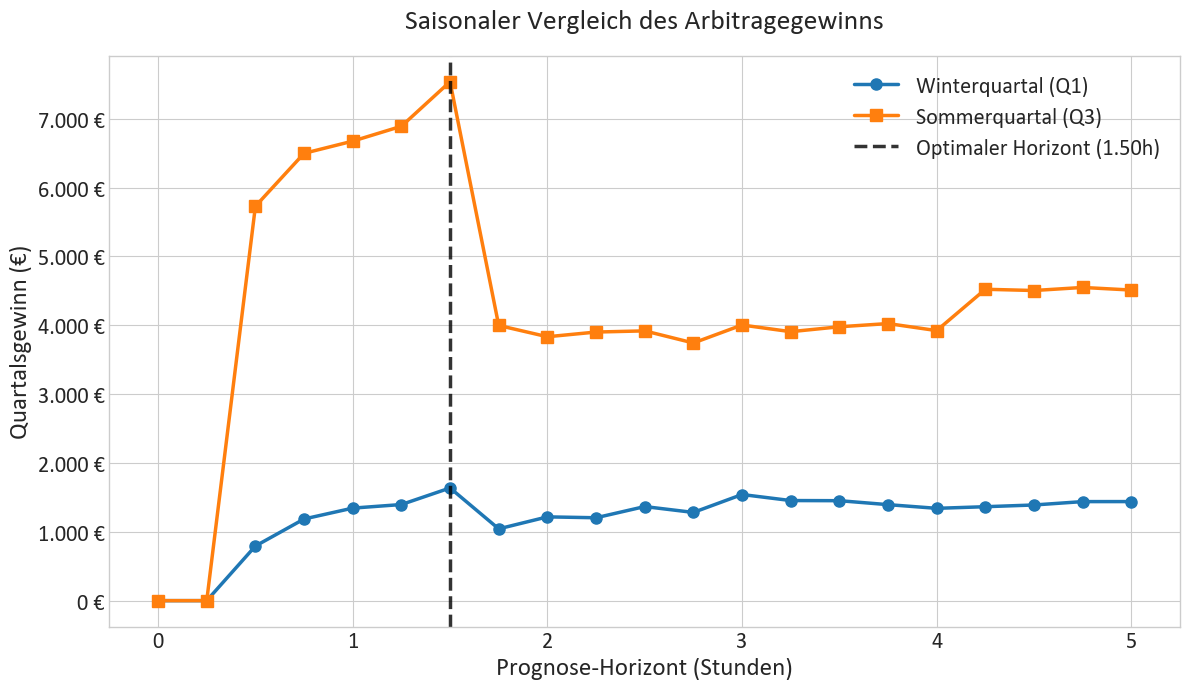

Finale Grafik wurde als 'saisonaler_vergleich_final.png' gespeichert.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter


# --- FINALE STIL-KONFIGURATION ---

# Schritt 1: Lade den Seaborn-Stil als Basis.
plt.style.use('seaborn-v0_8-whitegrid')

# Schritt 2: Überschreibe und verfeinere die Details mit deinen rcParams.
# Deine Schriftgrößen haben jetzt das letzte Wort und überschreiben die Seaborn-Vorgaben.
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Calibri'],  # Oder 'Arial', falls Calibri fehlt

    # --- Deine gewünschten Schriftgrößen ---
    'figure.titlesize': 22,
    'axes.titlesize': 20,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,

    # --- Deine weiteren Anpassungen ---
    'axes.titlepad': 20,
    'lines.linewidth': 2.5, # Etwas dicker für bessere Sichtbarkeit
    'lines.markersize': 8
})

def create_seasonal_comparison_plot_unified_optimum():
    """
    Erstellt eine finale, saubere Grafik, die die Gewinnkurven für 
    Winter- und Sommerquartal vergleicht und das gemeinsame Optimum 
    mit einer einzigen Linie markiert.
    """
    # Daten aus den Logdateien
    winter_data = {
        0: 0.0, 1: 0.0, 2: 793.21, 3: 1186.00, 4: 1344.02, 5: 1395.89,
        6: 1636.62, 7: 1042.86, 8: 1216.84, 9: 1203.90, 10: 1366.42,
        11: 1281.39, 12: 1541.53, 13: 1453.88, 14: 1451.78, 15: 1394.40,
        16: 1340.84, 17: 1364.43, 18: 1389.48, 19: 1438.54, 20: 1438.87
    }
    
    summer_data = {
        0: 0.0, 1: 0.0, 2: 5728.64, 3: 6497.57, 4: 6674.72, 5: 6890.69,
        6: 7537.66, 7: 3997.24, 8: 3833.22, 9: 3901.56, 10: 3918.50,
        11: 3742.66, 12: 4003.85, 13: 3906.84, 14: 3977.97, 15: 4024.82,
        16: 3922.49, 17: 4522.79, 18: 4504.83, 19: 4549.31, 20: 4511.52
    }
    
    # Daten für den Plot vorbereiten
    winter_df = pd.DataFrame(list(winter_data.items()), columns=['window_size', 'profit'])
    summer_df = pd.DataFrame(list(summer_data.items()), columns=['window_size', 'profit'])
    
    winter_df['window_hours'] = winter_df['window_size'] / 4
    summer_df['window_hours'] = summer_df['window_size'] / 4
    
    # Grafik erstellen
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot der Kurven
    ax.plot(winter_df['window_hours'], winter_df['profit'], marker='o', linestyle='-', label='Winterquartal (Q1)')
    ax.plot(summer_df['window_hours'], summer_df['profit'], marker='s', linestyle='-', label='Sommerquartal (Q3)')
    
    # --- NEU: Einzelne Linie für das gemeinsame visuelle Optimum ---
    optimal_horizon_hours = 1.5
    ax.axvline(x=optimal_horizon_hours, color='k', linestyle='--', alpha=0.8, 
               label=f"Optimaler Horizont ({optimal_horizon_hours:.2f}h)")

    # Achsenbeschriftungen und Titel
    ax.set_xlabel('Prognose-Horizont (Stunden)')
    ax.set_ylabel('Quartalsgewinn (€)')
    ax.set_title('Saisonaler Vergleich des Arbitragegewinns')
    
    # Y-Achse formatieren
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f} €'.replace(',', '.')))
    
    # Legende und Layout
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('saisonaler_vergleich_final.png', dpi=300)
    plt.show()
    
    print("Finale Grafik wurde als 'saisonaler_vergleich_final.png' gespeichert.")

if __name__ == "__main__":
    create_seasonal_comparison_plot_unified_optimum()